In [1]:
import pandas as pd

# 以下两种效果一样，如果是网址，它会自动将数据下载到内存
# df = pd.read_excel('https://www.gairuo.com/file/data/dataset/team.xlsx')
# df = pd.read_excel('team.xlsx') # 文件在notebook文件同一目录下
# 如果是CSV，使用pd.read_csv()，还支持很多类型的数据读取

读取数据
使用DataFrame df 读取

In [3]:
df = pd.read_excel('../../data/team.xlsx')

In [4]:
df

,name,team,Q1,Q2,Q3,Q4
0,Liver,E,89,21,24,64
1,Arry,C,36,37,37,57
2,Ack,A,57,60,18,84
3,Eorge,C,93,96,71,78
4,Oah,D,65,49,61,86
...,...,...,...,...,...,...
95,Gabriel,C,48,59,87,74
96,Austin7,C,21,31,30,43
97,Lincoln4,C,98,93,1,20
98,Eli,E,11,74,58,91


In [5]:
# 查看前5条
df.head()
# 查看后5条
# df.tail()
# 随机查看5条
# df.sample()

,name,team,Q1,Q2,Q3,Q4
0,Liver,E,89,21,24,64
1,Arry,C,36,37,37,57
2,Ack,A,57,60,18,84
3,Eorge,C,93,96,71,78
4,Oah,D,65,49,61,86


查看数据

验证数据

In [6]:
# 查看行数和列数
# df.shape
# 查看所有、数据类型和内存信息
# df.info()
# 查看数值类型列的汇总统计
# df.describe()
# 查看各字段类型
# df.dtypes
# 显示数据行和列名
# df.axes
# 查看列名
df.columns

Index(['name', 'team', 'Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

建立索引

In [7]:
# 创建索引并生效
df.set_index('name', inplace=True)

In [8]:
# 不再以数字id作为索引，开始使用name
df.head()

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Arry,C,36,37,37,57
Ack,A,57,60,18,84
Eorge,C,93,96,71,78
Oah,D,65,49,61,86


数据选取

In [10]:
# df['Q1']
# 相同效果
df.Q1

name
Liver       89
Arry        36
Ack         57
Eorge       93
Oah         65
            ..
Gabriel     48
Austin7     21
Lincoln4    98
Eli         11
Ben         21
Name: Q1, Length: 100, dtype: int64

In [11]:
# 选择多列
df[['team', 'Q1']]
# df.loc[x, y]  x 代表行，y代表列
# df.loc[:, ['team', 'Q1']]

,team,Q1
name,,
Liver,E,89
Arry,C,36
Ack,A,57
Eorge,C,93
Oah,D,65
...,...,...
Gabriel,C,48
Austin7,C,21
Lincoln4,C,98


In [12]:
# 指定行
df[df.index == 'Liver']

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64


In [13]:
# 自然索引选择
# 取前三行
df[0: 3]

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Arry,C,36,37,37,57
Ack,A,57,60,18,84


In [15]:
# 0到10范围内取，步长为2
df[0: 10: 2]

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Ack,A,57,60,18,84
Oah,D,65,49,61,86
Acob,B,61,95,94,8
Reddie,D,64,93,57,72


In [17]:
df.iloc[:10,:]

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Arry,C,36,37,37,57
Ack,A,57,60,18,84
Eorge,C,93,96,71,78
Oah,D,65,49,61,86
Harlie,C,24,13,87,43
Acob,B,61,95,94,8
Lfie,A,9,10,99,37
Reddie,D,64,93,57,72


In [18]:
# 指定行和列
df.loc['Ben', 'Q1': 'Q4']

Q1    21
Q2    43
Q3    41
Q4    74
Name: Ben, dtype: object

In [19]:
# 条件筛选
df[df.Q1 > 90]

,team,Q1,Q2,Q3,Q4
name,,,,,
Eorge,C,93,96,71,78
Henry,A,91,15,75,17
Max,E,97,75,41,3
Alexander,C,91,76,26,79
Elijah,B,97,89,15,46
Ryan,E,92,70,64,31
Aaron,A,96,75,55,8
Lincoln4,C,98,93,1,20


In [20]:
# 组合条件
# 多重筛选
df[df['team'] == 'C'].loc[df.Q1 > 90]

,team,Q1,Q2,Q3,Q4
name,,,,,
Eorge,C,93,96,71,78
Alexander,C,91,76,26,79
Lincoln4,C,98,93,1,20


In [21]:
# and筛选
df[(df['Q1'] > 90) & (df['team'] == 'C')]

,team,Q1,Q2,Q3,Q4
name,,,,,
Eorge,C,93,96,71,78
Alexander,C,91,76,26,79
Lincoln4,C,98,93,1,20


排序

In [23]:
# 指定列升序排列
# df.sort_values(by='Q1')
# 降序
# df.sort_values(by='Q1', ascending=False)
# 一列升序一列降序
df.sort_values(['team', 'Q1'], ascending=[True, False])

,team,Q1,Q2,Q3,Q4
name,,,,,
Aaron,A,96,75,55,8
Henry,A,91,15,75,17
Nathan,A,87,77,62,13
Dylan,A,86,87,65,20
Blake,A,78,23,93,9
...,...,...,...,...,...
Eli,E,11,74,58,91
Jude,E,8,45,13,65
Rory9,E,8,12,58,27


分组聚合

In [24]:
# 按团队分组对应列相加
df.groupby('team').sum()

,Q1,Q2,Q3,Q4
team,,,,
A,1066,639,875,783
B,975,1218,1202,1136
C,1056,1194,1068,1127
D,860,1191,1241,1199
E,963,1013,881,1033


In [25]:
# 求团队分组对应列平均
df.groupby('team').mean()

,Q1,Q2,Q3,Q4
team,,,,
A,62.705882,37.588235,51.470588,46.058824
B,44.318182,55.363636,54.636364,51.636364
C,48.000000,54.272727,48.545455,51.227273
D,45.263158,62.684211,65.315789,63.105263
E,48.150000,50.650000,44.050000,51.650000


In [28]:
# 求不同列不同的计算方法
df.groupby('team').agg({
    'Q1': 'sum',        # 总和
    'Q2': 'count',      # 总数
    'Q3': 'mean',       # 平均
    'Q4': 'max'         # 最大值
})

,Q1,Q2,Q3,Q4
team,,,,
A,1066,17,51.470588,97
B,975,22,54.636364,99
C,1056,22,48.545455,98
D,860,19,65.315789,99
E,963,20,44.050000,98


数据转换

In [29]:
df.groupby('team').sum()

,Q1,Q2,Q3,Q4
team,,,,
A,1066,639,875,783
B,975,1218,1202,1136
C,1056,1194,1068,1127
D,860,1191,1241,1199
E,963,1013,881,1033


In [30]:
df.groupby('team').sum().T

team,A,B,C,D,E
Q1,1066,975,1056,860,963
Q2,639,1218,1194,1191,1013
Q3,875,1202,1068,1241,881
Q4,783,1136,1127,1199,1033


In [31]:
df.groupby('team').sum().stack()

team    
A     Q1    1066
      Q2     639
      Q3     875
      Q4     783
B     Q1     975
      Q2    1218
      Q3    1202
      Q4    1136
C     Q1    1056
      Q2    1194
      Q3    1068
      Q4    1127
D     Q1     860
      Q2    1191
      Q3    1241
      Q4    1199
E     Q1     963
      Q2    1013
      Q3     881
      Q4    1033
dtype: int64

In [32]:
df.groupby('team').sum().unstack()

    team
Q1  A       1066
    B        975
    C       1056
    D        860
    E        963
Q2  A        639
    B       1218
    C       1194
    D       1191
    E       1013
Q3  A        875
    B       1202
    C       1068
    D       1241
    E        881
Q4  A        783
    B       1136
    C       1127
    D       1199
    E       1033
dtype: int64

增加列

In [33]:
df['one'] = 1
# 增加总成绩列
df['total'] = df.Q1 + df.Q2 + df.Q3 + df.Q4
# 指定某几列的加和
# df['total'] = df.loc[:, 'Q1': 'Q4'].apply(lambda x: sum(x), axis=1)
# 把所有数字的列相加
# df['total'] = df.sum(axis=1)

df['avg'] = df.total / 4

统计分析

In [44]:
# 返回所有列的均值
# df[['Q1', 'Q2', 'Q3', 'Q4']].mean()       # 均值
df[['Q1', 'Q2', 'Q3', 'Q4']].mean(1)
# df.groupby('team')[['Q1', 'Q2', 'Q3', 'Q4']].var()        # 方差

# df[['team', 'Q1']]
# df[['Q1', 'Q2', 'Q3', 'Q4']].loc(df['team'] == 'C').mean()
# df[df['team'] == 'C'].loc[df.Q1 > 90]

name
Liver       49.50
Arry        41.75
Ack         54.75
Eorge       84.50
Oah         65.25
            ...  
Gabriel     67.00
Austin7     31.25
Lincoln4    53.00
Eli         58.50
Ben         44.75
Length: 100, dtype: float64

绘图

team
A    Axes(0.125,0.11;0.775x0.77)
B    Axes(0.125,0.11;0.775x0.77)
C    Axes(0.125,0.11;0.775x0.77)
D    Axes(0.125,0.11;0.775x0.77)
E    Axes(0.125,0.11;0.775x0.77)
Name: Q1, dtype: object

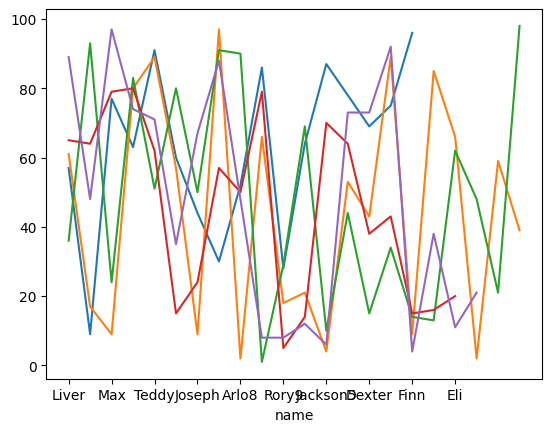

In [50]:
# Q1成绩的折线分布
df.groupby('team')['Q1'].plot()

<Axes: >

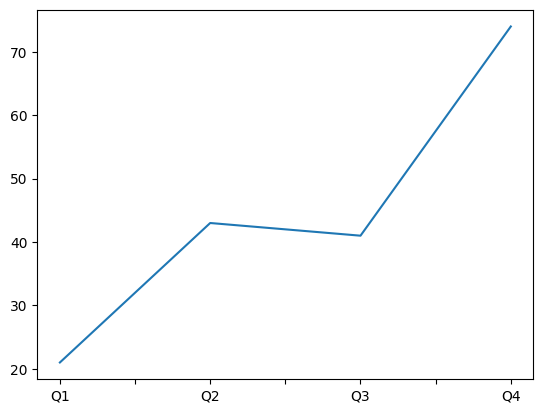

In [51]:
# 指定列指定行范围变化
df.loc['Ben', 'Q1': 'Q4'].plot()

<Axes: >

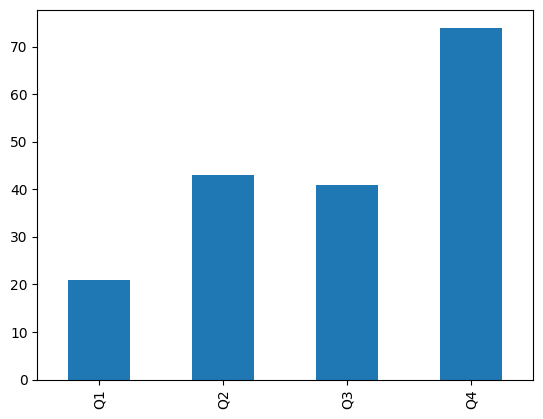

In [52]:
# 输出柱状图
df.loc['Ben', 'Q1': 'Q4'].plot.bar()
# 横向柱状图
# df.loc['Ben', 'Q1': 'Q4'].plot.barh()

<Axes: >

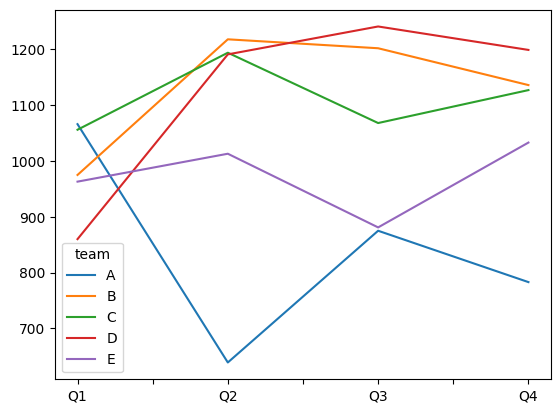

In [54]:
# 各个Team总成绩趋势
df.groupby('team')[['Q1', 'Q2', 'Q3', 'Q4']].sum().T.plot()

<Axes: ylabel='Q1'>

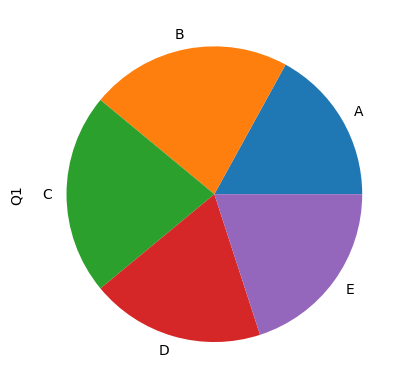

In [56]:
# 各组人数对比
df.groupby('team').count().Q1.plot.pie()

数据导出

In [57]:
# 导出excel文件
df.to_excel('../export/test1.xlsx')
# 导出csv文件
# df.to_csv('../export/test1.csv')